# Redes Neuronales (pure Pyhton)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

## Una Red Neuronal Simple (sin capas ocultas)

Una red neuronal con $N_0$ neuronas de entrada y $N_1$ neuronas de salida (sin capas ocultas)
$$ y_j^{\text{out}}=f\left(\sum_{k}w_{jk}y_k^{\text{in}}+b_j\right)$$
donde $w$ es la matriz de prdod, $b$ es el vector bias, y $f$ es una funcion de activacion.

In [2]:
N0 = 3  # tamano de la capa de entrada
N1 = 2  # tamano de la capa de salida

# Inicializamos peso aleatorios: un array N0 x N1
w = np.random.uniform(low = -1, high = +1, size=(N0, N1))

# Inicializamos biases alaetorios: vector N1
b = np.random.uniform(low = -1, high = +1, size = N1)

In [3]:
# Valores de entrada
y_in= np.array([0.1 , 0.5, -0.2])

In [4]:
# evaluamos la red neuronal a mano, en dos pasos
z = np.dot(y_in, w) + b # resultado: el vector de valores 'z', de lpongitud N1
y_out = 1/(1+np.exp(-z)) # la funcion sigmoide (aplicada a cada elemento)

In [5]:
print("entrada de la red neuronal y_in:", y_in)
print("pesos w:", w)
print("vector bias b:", b)
print("superposicion lineal z:", z)
print("salida de la red neuronal y_out:", y_out)

entrada de la red neuronal y_in: [ 0.1  0.5 -0.2]
pesos w: [[ 0.74351809 -0.29033623]
 [ 0.92118802 -0.32420328]
 [ 0.0782495   0.55898744]]
vector bias b: [-0.03528289 -0.45584175]
superposicion lineal z: [ 0.48401302 -0.7587745 ]
salida de la red neuronal y_out: [0.61869504 0.31891239]


## Veamos el resultado de la Red Neuronal

Definamos una funcion que evalua la red y muestra la salida para varias entradas:

In [6]:
# funcion que alpica la red neuronal
def apply_simple_net(y_in):
    global w, b
    z = np.dot(y_in, w) + b  
    return (1/(1 + np.exp(-z)))

In [7]:
N0 = 2 # tamano de la capa de entrada
N1 = 1 # tamano de la capa de salida

w = np.random.uniform(low = -10, high = +10, size = (N0, N1)) # pesos aleatorios: N1 x N0
b = np.random.uniform(low = -1, high = +1, size = N1) # biases: vector N1

In [8]:
apply_simple_net([0.5, 0.2]) # una prueba simple

array([0.2073598])

Este es un metodo simple apra ahcerlo, sin embargo no es eficiente. Despues haremos uso de una sintaxis de arrays eficiente.

In [9]:
M = 50 # tamano de l aimagen M x M
y_out = np.zeros([M,M]) # array M x M, para guardar el resultado

In [10]:
for j1 in range(M):
    for j2 in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        value0 = float(j1) / M - 0.5
        value1 = float(j2) / M - 0.5
        y_out[j1,j2] = apply_simple_net([value0,value1])[0]

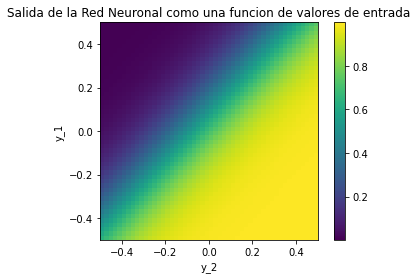

In [11]:
# Mostramos la imagen
plt.imshow(y_out, origin = 'lower', extent = (-0.5, 0.5, -0.5, 0.5))
plt.colorbar()
plt.title("Salida de la Red Neuronal como una funcion de valores de entrada")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

## Red Neuronal con  una capa oculta

La idea aquí es tener múltiples matrices de peso (para cada par de capas subsiguientes hay una matriz de peso). La función que "aplica una capa", es decir, va de una capa a la siguiente, es esencialmente la misma que la función que evalúa la red simple anterior.

In [12]:
# una funcion que evalua una capa basada en los valores de una neurona en la capa anterior
def apply_layer(y_in,w,b): 
    z = np.dot(w,y_in) + b
    return(1/(1 + np.exp(-z)))

In [13]:

N0 = 2 # tamano de la capa de entrada
N1 = 30 # tamano de la capa oculta
N2 = 1 # tamano de la capa de salida

In [14]:
# pesos y biases de la cada de entrada a la capa oculta
w1 = np.random.uniform(low = -10, high = +10, size = (N1, N0)) # pesos aleatorios: N1 x N0
b1 = np.random.uniform(low = -1, high = +1, size = N1) # biases: vector N1



In [15]:
# pesos y biases de la capa oculta a la capa de salida
w2 = np.random.uniform(low = -10, high = +10, size = (N2, N1)) # pesos aleatoreos
b2 = np.random.uniform(low = -1, high = +1, size = N2) # biases

In [16]:
# Evalua la red neuronal por subsecuencia
# evaluacion en dos pasos (entrada a oculta y oculta a salida)
def apply_net(y_in):
    global w1,b1,w2,b2
    
    y1=apply_layer(y_in,w1,b1)
    y2=apply_layer(y1,w2,b2)
    return(y2)

Esta no es la manera mas eficiente, pero funciona y es simple.

In [17]:
# Obtenemos los valores para los rangos de las entradas
M = 50 # crea una imgaden de tamano M x M
y_out = np.zeros([M, M]) # array M x M, para gaurdar los resultados

In [18]:
for j1 in range(M):
    for j2 in range(M):
        value0=float(j1) / M - 0.5
        value1=float(j2) / M - 0.5
        y_out[j1, j2] = apply_net([value0, value1])[0]

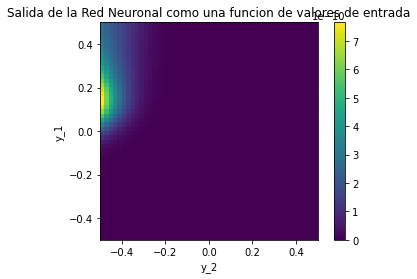

In [19]:
# mostramos la imagen
plt.imshow(y_out, origin = 'lower', extent = (-0.5, 0.5, -0.5, 0.5))
plt.colorbar()
plt.title("Salida de la Red Neuronal como una funcion de valores de entrada")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

La forma de la salida ya es más 'compleja' que la de una red simple sin capa oculta.

Vayamos más allá en esa dirección...

## Aplicar una red a un 'batch' de muestras (trucos de Python)

La idea es aplicar la red neuronal a muchas muestras en paralelo (no lazos for).

### Pequeno experimento: multiplicación de vector-matriz

In [20]:
# Veamos que hace el producto dot: 
W = np.zeros([7, 8])
y = np.zeros([8, 30]) 
# here '30' would stand for the number of samples
# in our envisaged network applications
np.shape(np.dot(W, y))

(7, 30)

In [21]:
## ahora tratemos de anadir al vector bias,
#B = np.zeros(7)
#result = np.dot(W, y) + B # Producira un error

In [22]:
# Reordenando lso indices hace que funcione
y = np.zeros([30, 8])
W = np.zeros([8, 7])
np.shape(np.dot(y, W))

(30, 7)

In [23]:
# y ahora tratemos de nuevo anadir el vector bias,
B = np.zeros(7)
result = np.dot(y, W) + B 
np.shape(result)

(30, 7)

### Definamos funciones que evaluen la capa y evalue la red neuronal, con proceso de lotes

Configuraion para procesamiento por lotes, es decir, evaluación paralela de muchas muestras de entrada.

In [24]:
# una funcion que aplica una capa
def apply_layer_new(y_in,w,b):
    z = np.dot(y_in, w) + b # notemos el orden diferente en la matriz producto
    return(1/(1 + np.exp(-z)))

In [25]:
# como la anterior, pero con una nueva capa
def apply_net_new(y_in):
    global w1,b1,w2,b2
    
    y1 = apply_layer_new(y_in, w1, b1)
    y2 = apply_layer_new(y1, w2, b2)
    return(y2)

In [26]:
N0 = 2 # tamano de la cada de entrada
N1 = 5 # tamano de la cada oculta
N2 = 1 #  tamano de la cada de salida

In [27]:
# de la capa de entrada a la capa oculta
w1 = np.random.uniform(low = -10, high = +10, size = (N0, N1)) # nueva ordn N0 x N1
b1 = np.random.uniform(low = -1, high = +1, size = N1) # biases: N1 vector

In [28]:
# de la capa oculta a la capa de salida
w2 = np.random.uniform(low = -10, high = +10, size = (N1, N2)) # nueva orden N1 x N2
b2 = np.random.uniform(low = -1, high = +1, size = N2) # biases

In [29]:
batchsize = 10000
y = np.random.uniform(low = -1, high = 1, size = (batchsize, 2))

In [30]:
y_out=apply_net_new(y)

In [31]:
np.shape(y_out) 
# estas son 10000 muestras evalaudas en paralelo

(10000, 1)

### Ahora mostremos la red multi capas, de manera mas eficiente

In [32]:
M = 50

# Generemos una malla, i.e. valores en x,y
v0, v1 = np.meshgrid(np.linspace(-0.5,0.5,M), np.linspace(-0.5,0.5,M))

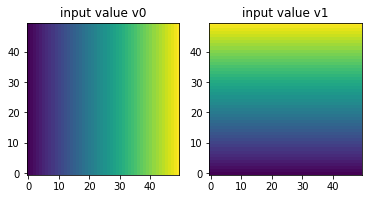

In [33]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(v0, origin = 'lower')
ax[0].set_title("input value v0")
ax[1].imshow(v1, origin = 'lower')
ax[1].set_title("input value v1")
plt.show()

In [34]:
v0flat = v0.flatten() # make 1D array out of 2D array
v1flat = v1.flatten() 
# that means: MxM matrix becomes M^2 vector
np.shape(v0flat)

(2500,)

In [35]:
batchsize = np.shape(v0flat)[0] # numero de muestras = numero de pixeles
y_in = np.zeros([batchsize, 2])
y_in[:, 0] = v0flat # llenamos la primera componente (index 0)
y_in[:, 1] = v1flat # llenamos la segunda compotente

In [36]:
# aplicamos la red a todas las muetras simmultaneamente
y_out = apply_net_new(y_in)

In [37]:
np.shape(y_out) # esto no es un vector, pero si una matriz  batchsize x 1

(2500, 1)

In [38]:
# transformamos de nuevo en una matriz (image)
y_2D = np.reshape(y_out[:, 0], [M, M])

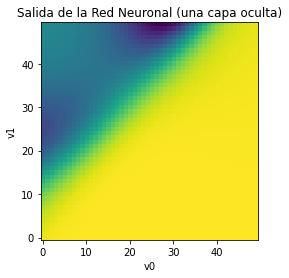

In [39]:
plt.imshow(y_2D, origin = 'lower')
plt.title("Salida de la Red Neuronal (una capa oculta)")
plt.xlabel("v0")
plt.ylabel("v1")
plt.show()

## Una Red Neuronal con mas capas ocultas

In [40]:
Nlayers = 20 # no cuenta la capa de entrada ni salida
LayerSize = 100

In [41]:
Weights = np.random.uniform(low = -3, high = 3, size = [Nlayers, LayerSize, LayerSize])
Biases = np.random.uniform(low = -1, high = 1, size = [Nlayers, LayerSize])

In [42]:
# para la primera capa oculta
WeightsFirst = np.random.uniform(low = -1, high = 1, size = [2, LayerSize])
BiasesFirst = np.random.uniform(low = -1, high = 1, size = LayerSize)

In [43]:
# para la capa de salida
WeightsFinal = np.random.uniform(low = -1, high = 1, size = [LayerSize, 1])
BiasesFinal = np.random.uniform(low = -1, high = 1, size = 1)

In [44]:
def apply_multi_net(y_in):
    global Weights, Biases, WeightsFinal, BiasesFinal, Nlayers
    
    y = apply_layer_new(y_in, WeightsFirst, BiasesFirst)    
    for j in range(Nlayers):
        y = apply_layer_new(y, Weights[j, :, :], Biases[j, :])
    output = apply_layer_new(y, WeightsFinal, BiasesFinal)
    return(output)

In [45]:
# Generamos una malla, i.e. valores x,y en una imagen
M = 40
v0, v1 = np.meshgrid(np.linspace(-0.5, 0.5, M), np.linspace(-0.5, 0.5, M))
batchsize = M**2 # numero muestras = numero de pixeles = M^2
y_in = np.zeros([batchsize, 2])
y_in[:, 0] = v0.flatten() # rellenamos la priemra componente (index 0)
y_in[:, 1] = v1.flatten() # rellenamos la segunda componente

In [46]:
# unsamos la malla de entrada MxM
y_out = apply_multi_net(y_in) # aplicamos la red a todas las muestras

In [47]:
y_2D = np.reshape(y_out[:, 0], [M, M]) # obtenemos la imagen 2D

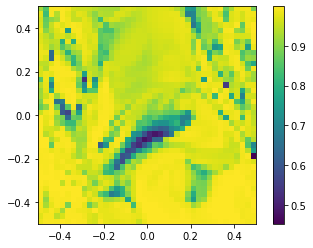

In [48]:
plt.imshow(y_2D, origin = 'lower', extent = [-0.5, 0.5, -0.5, 0.5], interpolation = 'nearest')
plt.colorbar()
plt.show()

Ahora haremos lo mismo, pero con una resolucion mayor

In [49]:
M = 400
# Generamos una malla, i.e. valores x,y en una imagen
v0, v1 = np.meshgrid(np.linspace(-0.5, 0.5, M), np.linspace(-0.5, 0.5, M))
batchsize = M**2 # numero de muestras = numero de pixeles = M^2
y_in = np.zeros([batchsize, 2])
y_in[:, 0] = v0.flatten() # rellenamos la primera componente (index 0)
y_in[:, 1] = v1.flatten() # rellenamos la segunda componente

In [50]:
%%time
# usamos la malla de entrada MxM
y_out = apply_multi_net(y_in) # aplicamos la red a todas las muestras

CPU times: user 37.4 s, sys: 26.5 s, total: 1min 3s
Wall time: 12.6 s


In [51]:
y_2D = np.reshape(y_out[:, 0], [M, M]) # regresamos la imagen 2D

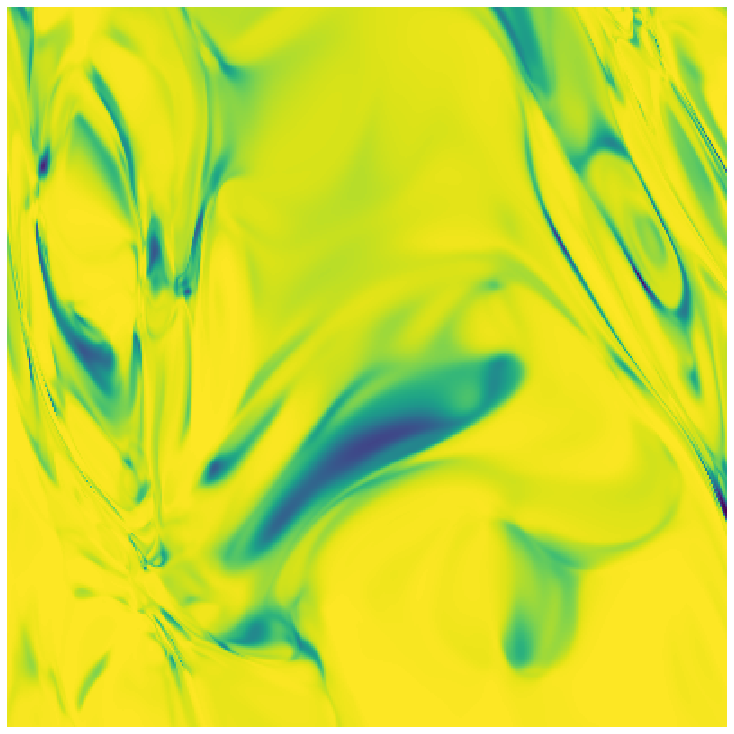

In [52]:
plt.figure(figsize=[10, 10])
plt.axes([0, 0, 1, 1]) # rellenamos toda la figura con la imagen
plt.imshow(y_2D, origin = 'lower', extent = [-0.5, 0.5, -0.5, 0.5], interpolation = 'nearest')
plt.axis('off') # no axes
plt.show()

## Probemos otra funcion no lineal: reLU (rectified linear units)

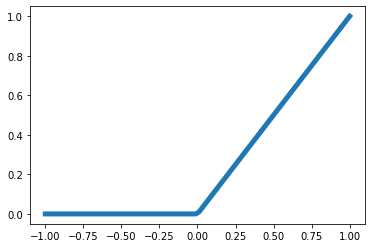

In [53]:
x = np.linspace(-1, 1, 100)
plt.plot(x, x*(x>0), linewidth = 5)
plt.show()

In [54]:
# Una funcion que aplica una capa
def apply_layer_new_relu(y_in, w, b):
    z = np.dot(y_in, w) + b # notemos la diferencia en el orden del producto de matrices
    return(z*(z>0))

In [55]:
def apply_multi_net_relu(y_in):
    global Weights, Biases, WeightsFinal, BiasesFinal, Nlayers
    
    y = apply_layer_new_relu(y_in, WeightsFirst, BiasesFirst)    
    for j in range(Nlayers):
        y = apply_layer_new_relu(y, Weights[j, :, :], Biases[j, :])
    output = apply_layer_new_relu(y, WeightsFinal, BiasesFinal)
    return(output)

In [56]:
Nlayers = 20 # no cuenta la capa de entrada ni salida
LayerSize = 100

In [57]:
Weights = np.random.uniform(low = -1, high = 1, size = [Nlayers, LayerSize, LayerSize])
Biases = 0*np.random.uniform(low = -1, high = 1, size = [Nlayers, LayerSize])

In [58]:
# para la primera cada oculta
WeightsFirst = np.random.uniform(low = -1, high = 1, size = [2, LayerSize])
BiasesFirst = 0*np.random.uniform(low = -1, high = 1, size = LayerSize)

In [59]:
# para la capa final
WeightsFinal = np.random.uniform(low = -1, high = 1, size = [LayerSize, 1])
BiasesFinal = 0*np.random.uniform(low = -1, high = 1, size = 1)

In [60]:
M = 400
# Generamos una malla, i.e. valores x,y en una imagen
v0, v1 = np.meshgrid(np.linspace(-0.5, 0.5, M), np.linspace(-0.5, 0.5, M))
batchsize = M**2 # numero de meustras = numero de pixeles = M^2
y_in = np.zeros([batchsize, 2])
y_in[:, 0] = v0.flatten() # rellenamos la primera componente (index 0)
y_in[:, 1] = v1.flatten() # rellenamops la segunda componente

In [61]:
%%time
# usamos la malla de entrada MxM
y_out = apply_multi_net_relu(y_in) # aplicamos la red a todos las muestras

CPU times: user 32.9 s, sys: 25.1 s, total: 58.1 s
Wall time: 6.28 s


In [62]:
y_2D = np.reshape(y_out[:, 0], [M, M]) # regresamos a la imagen 2D

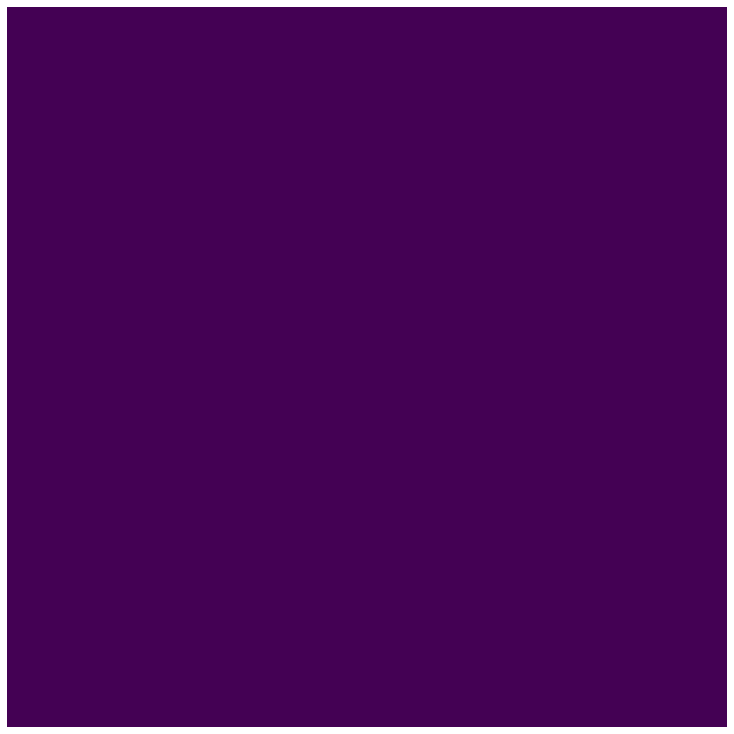

In [63]:
plt.figure(figsize=[10, 10])
plt.axes([0, 0, 1, 1]) # frellenamos toda la figura con la imagen
plt.imshow(y_2D, origin = 'lower', extent = [-0.5, 0.5, -0.5, 0.5], interpolation = 'nearest')
plt.axis('off') # no ejes
plt.show()

Ahora alejemonos

In [64]:
M = 400
# Generemos una malla, i.e. valores x,y en una imagen
v0, v1 = np.meshgrid(np.linspace(-10, 10, M), np.linspace(-10, 10, M))
batchsize = M**2 # numero de muestras = nbumero de pixeles = M^2
y_in = np.zeros([batchsize, 2])
y_in[:, 0] = v0.flatten() # rellenamos la primera componente (index 0)
y_in[:, 1] = v1.flatten() # rellenamos la segunda componente

In [65]:
# usamos la malla de entrada MxM
y_out = apply_multi_net_relu(y_in) # aplicamos la red a todas las muestras

In [66]:
y_2D = np.reshape(y_out[:, 0], [M, M]) # regresamos a la imgane en 2D

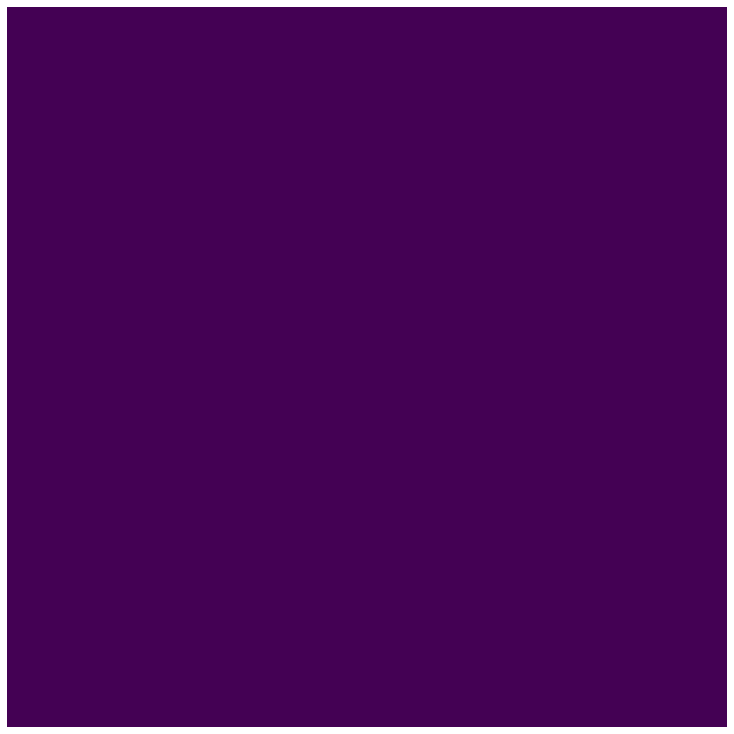

In [67]:
plt.figure(figsize=[10, 10])
plt.axes([0, 0, 1, 1]) # rellenamos toda la figura con la imagen
plt.imshow(y_2D, origin = 'lower', extent = [-0.5, 0.5, -0.5, 0.5], interpolation = 'nearest')
plt.axis('off') # no ejes
plt.show()

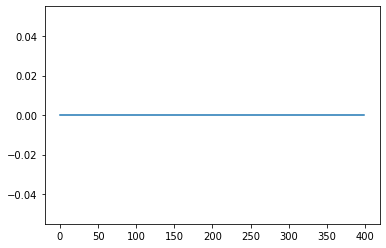

In [68]:
plt.plot(y_2D[:, 200])
plt.show()